# Используя код и графики (сделать примерно в таком же виде) из видео, визуализировать ваш датасет:
#   Построить график компаний с самым большим кол-вом вакансий
#   Построить график самых популярный названий в вакансиях
#   Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму
#   Построить график популярности по колонке Type of ownership, относительно численности вакансий
#   Построить график популярности по секторам работы
#   Построить график используя сектора работы и средний уровень зарплат в них
#   Построить гистограмму распределения рейтинга компаний
#   Построить график средних зарплат по популярным компаниям
#   Построить описаний вакансий облако тегов, исследовать самые популярные слова
#   В графиках использовать основные цвета сайта hh.ru

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./DataEngineer.csv')
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1


In [3]:
# Пропущенные данные
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

# Пропущеных данных нет

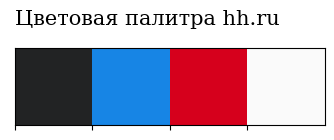

In [4]:
#В графиках использовать основные цвета сайта hh.ru
sns.palplot(['#222324','#1785e5','#d6001c','#fafafa'])
plt.title("Цветовая палитра hh.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

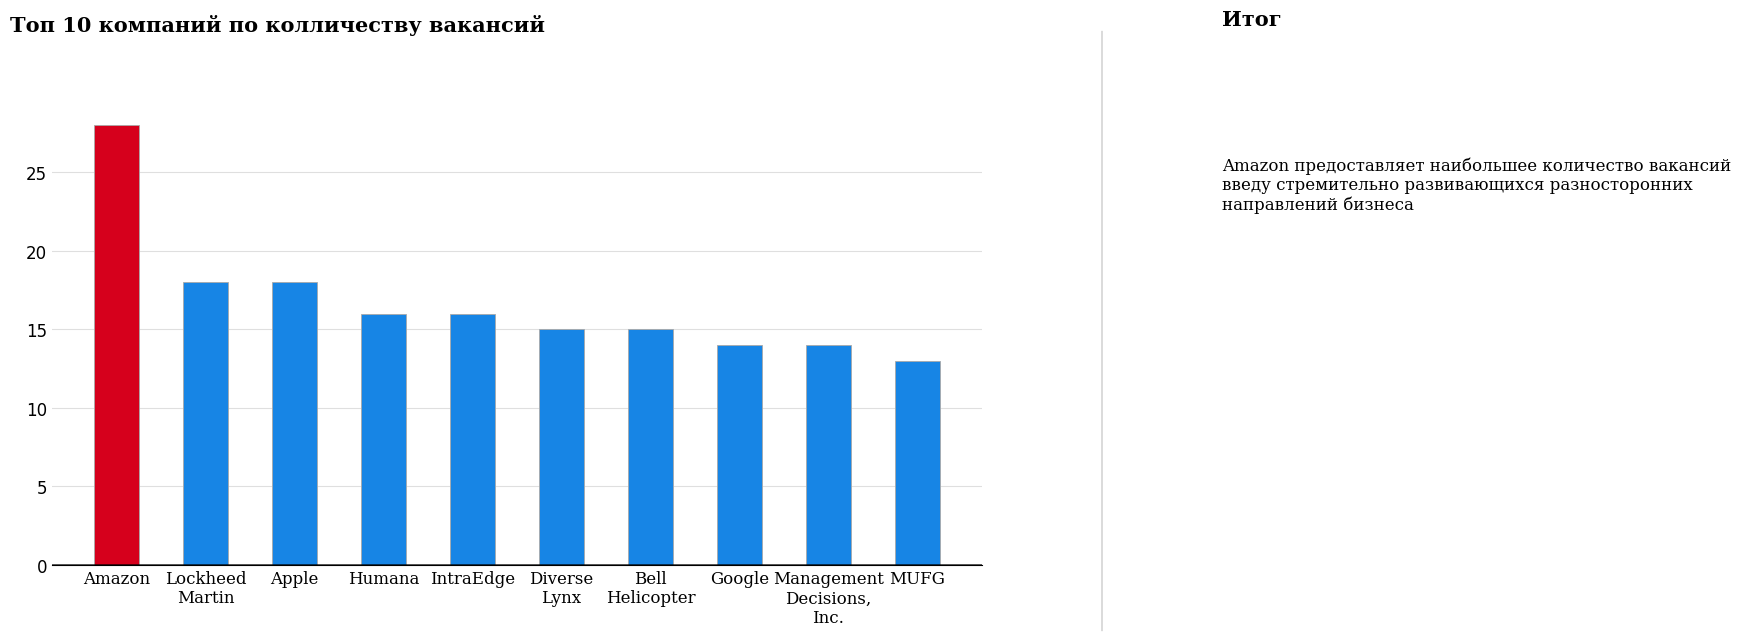

In [5]:
#Построить график компаний с самым большим кол-вом вакансий
df['count'] = 1
df['ComName'] = df['Company Name'].apply(lambda x :  x[:-4].replace(' ','\n')) 
data = df.groupby('ComName')['count'].sum().sort_values(ascending=False)[:10]


# Plot

color_map = ['#1785e5' for _ in range(10)]
color_map[0] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 компаний по колличеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
Amazon предоставляет наибольшее количество вакансий 
введу стремительно развивающихся разносторонних 
направлений бизнеса
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 30, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

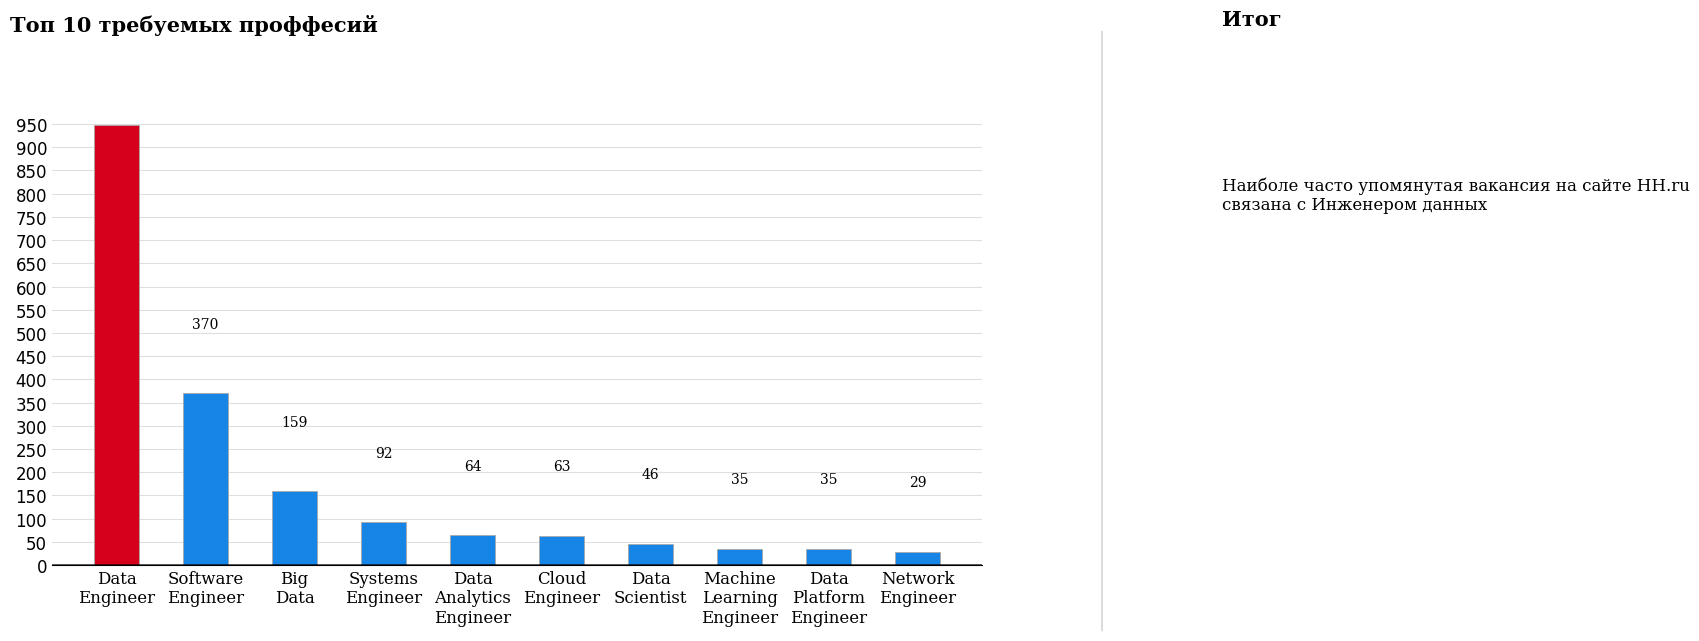

In [6]:
#Построить график самых популярный названий в вакансиях
df['JobTitle'] = df['Job Title']
def replace_title(x):
    r = ''
    if x.upper().find('Software'.upper())>-1: r = 'Software Engineer'
    elif x.upper().find('Systems'.upper())>-1: r = 'Systems Engineer'
    elif x.upper().find('Cloud'.upper())>-1: r = 'Cloud Engineer'
    elif x.upper().find('Machine Learning'.upper())>-1: r = 'Machine Learning Engineer'
    elif x.upper().find('Architect'.upper())>-1: r = 'Data Architect'
    elif x.upper().find('Analytics'.upper())>-1: r = 'Data Analytics Engineer'
    elif x.upper().find('Analyst'.upper())>-1: r = 'Data Analytics Engineer'
    elif x.upper().find('Scientist'.upper())>-1: r = 'Data Scientist'
    elif x.upper().find('Science'.upper())>-1: r = 'Data Scientist'
    elif x.upper().find('Full Stack'.upper())>-1: r = 'Full Stack Engineer'
    elif x.upper().find('Front End'.upper())>-1: r = 'Front End Engineer'
    elif x.upper().find('DevOps'.upper())>-1: r = 'DevOps Engineer'
    elif x.upper().find('Business Intelligence'.upper())>-1: r = 'Business Intelligence Engineer'
    elif x.upper().find('Warehouse'.upper())>-1: r = 'Data Warehouse Engineer'
    elif x.upper().find('Platform'.upper())>-1: r = 'Data Platform Engineer'
    elif x.upper().find('Integration'.upper())>-1: r = 'Data Integration Engineer'
    elif x.upper().find('Electrical'.upper())>-1: r = 'Electrical Engineer'
    elif x.upper().find('Sales'.upper())>-1: r = 'Sales Engineer'
    elif x.upper().find('Data Center'.upper())>-1: r = 'Data Center Engineer'
    elif x.upper().find('Network'.upper())>-1: r = 'Network Engineer'
    elif x.upper().find('Python'.upper())>-1: r = 'Python Engineer'
    elif x.upper().find('Quality'.upper())>-1: r = 'Quality Engineer'
    elif x.upper().find('Big Data'.upper())>-1: r = 'Big Data'
    elif x.upper().find('Database'.upper())>-1: r = 'Database Engineer'
    elif x.upper().find('Reliability'.upper())>-1: r = 'Reliability Engineer'
    elif x.upper().find('Solution'.upper())>-1: r = 'Solution Engineer'
    elif x.upper().find('Data Engineer'.upper())>-1: r = 'Data Engineer'
    else: r = x
    r = r.replace('  ',' ')
    r = r.replace(' ','\n')
    return r

df['JobTitle'] = df['JobTitle'].apply(lambda x :  replace_title(x)) 
data = df.groupby('JobTitle')['count'].sum().sort_values(ascending=False)[:10]


# Plot

color_map = ['#1785e5' for _ in range(10)]
color_map[0] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')


# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Топ 10 требуемых проффесий', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
Наиболе часто упомянутая вакансия на сайте HH.ru
связана с Инженером данных
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1000, 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Loc
Austin          199
Houston         199
San Diego       195
Chicago         192
San Antonio     190
New York        187
Philadelphia    135
Jacksonville    122
Phoenix         117
Los Angeles     106
Irving          106
Fort Worth      102
Dallas          102
Other           576
Name: count, dtype: int64
Loc
Austin          199
Houston         199
San Diego       195
Chicago         192
San Antonio     190
New York        187
Philadelphia    135
Jacksonville    122
Phoenix         117
Los Angeles     106
Irving          106
Fort Worth      102
Dallas          102
Other           576
Name: count, dtype: int64
Loc
Austin          199
Houston         199
San Diego       195
Chicago         192
San Antonio     190
New York        187
Philadelphia    135
Jacksonville    122
Phoenix         117
Los Angeles     106
Irving          106
Fort Worth      102
Dallas          102
Other           576
Name: count, dtype: int64
Loc
Austin          199
Houston         199
San Diego       195
Chicag

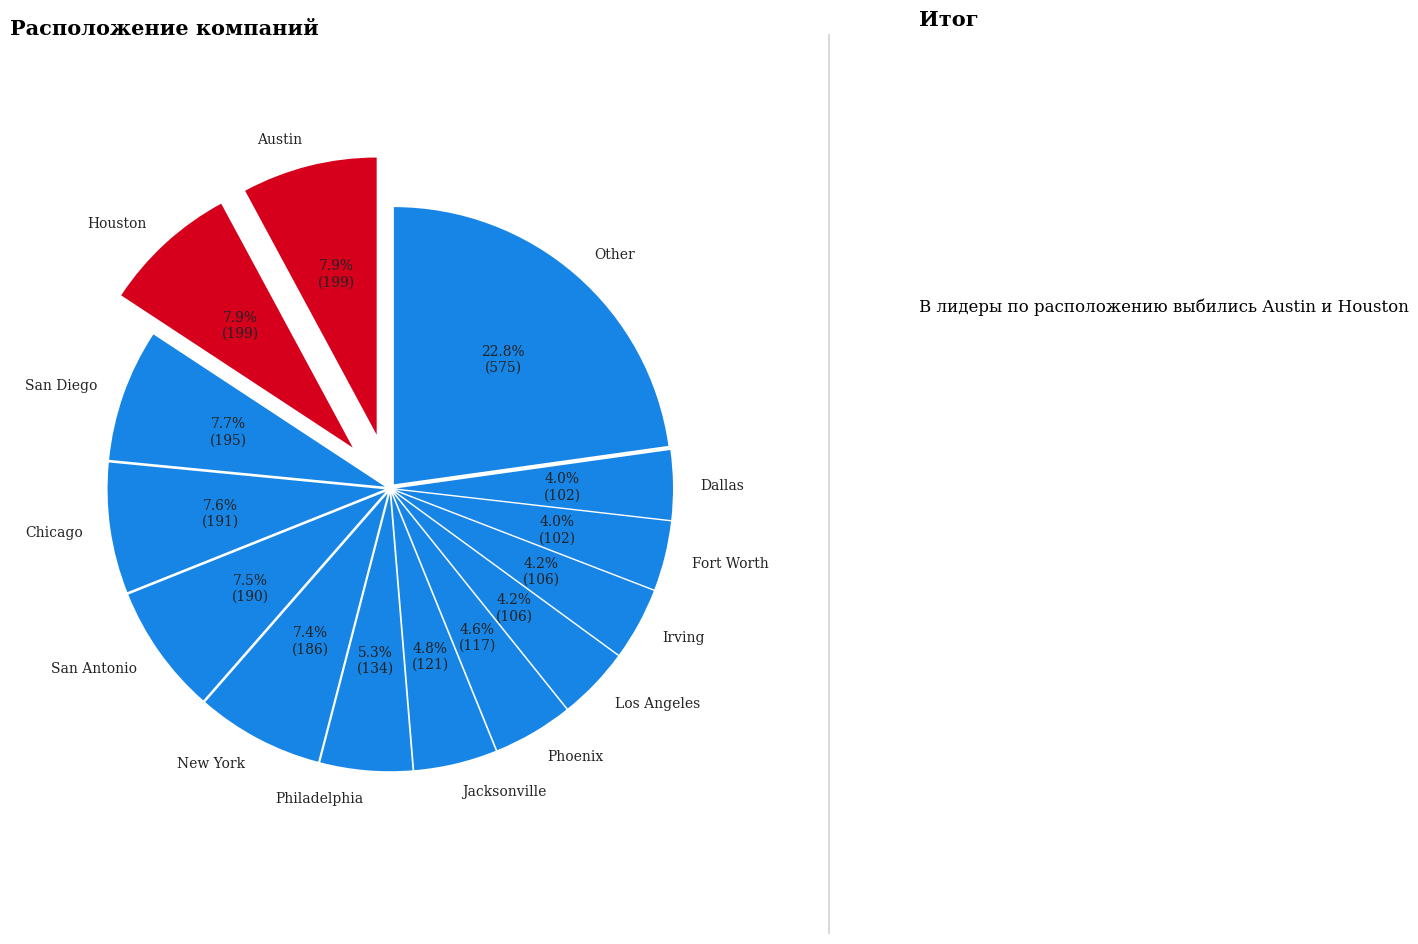

In [7]:
#Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

df['Loc'] = df['Location'].apply(lambda x :  x[:-4]) 
data = df.groupby('Loc')['count'].sum().sort_values(ascending=False)
rslt_df = data[data > 80]
rslt_df['Other'] = data.sum() - rslt_df.sum()

color_map = ['#1785e5' for _ in range(rslt_df.count())]
color_map[0] = color_map[1]=  '#d6001c' # color highlight

explode = [0.02 for _ in range(rslt_df.count())]
explode[0] = explode[1] =  0.2

fig, ax = plt.subplots(1,1, figsize=(9, 9))

def func(pct, allvalues):
    print(allvalues)
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(rslt_df,
                                  autopct = lambda pct: func(pct, rslt_df),
                                  explode = explode,
                                  labels = rslt_df.index,
                                #   shadow = True,
                                  colors = color_map,
                                  startangle = 90,
                                #   wedgeprops = wp,
                                  textprops = dict(color ="#222324",fontweight='light', fontfamily='serif')
                                  )

fig.text(0.09, 1, 'Расположение компаний', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
В лидеры по расположению выбились Austin и Houston
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.tick_params(axis='both', which='major', labelsize=12)

l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

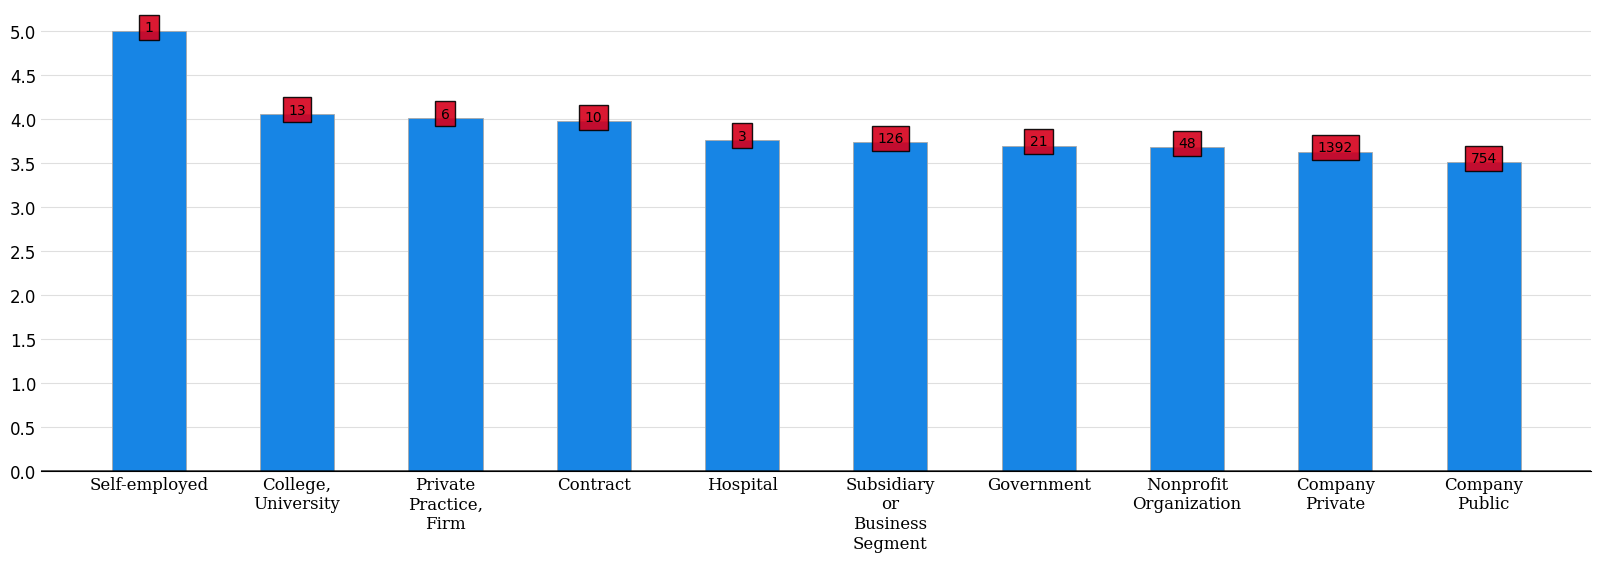

In [8]:
#Построить график популярности по колонке Type of ownership, относительно численности вакансий


d1 = df.groupby('Type of ownership')['count'].sum()
d2 = df.groupby('Type of ownership')['Rating'].mean()
d3 = pd.Series(d1.index,d1.index)

data = pd.DataFrame([d1,d2,d3]).T.drop('-1').sort_values(by='Rating', ascending=False)
data['ownership'] = data['Type of ownership'].apply(lambda x :  x.replace(' / ',', ').replace(' - ',' ').replace(' ','\n')) 
data = data[:10]

# Plot

color_map = ['#1785e5' for _ in range(data['count'].count())]

fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(data['ownership'], data['Rating'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data['ownership'], fontfamily='serif', rotation=0)

for i in range(data['count'].count()):
    ax.text(i, data['Rating'][i], data['count'][i], ha = 'center',
            bbox = dict(facecolor = '#d6001c', alpha =.9))

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 5.5, 0.5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

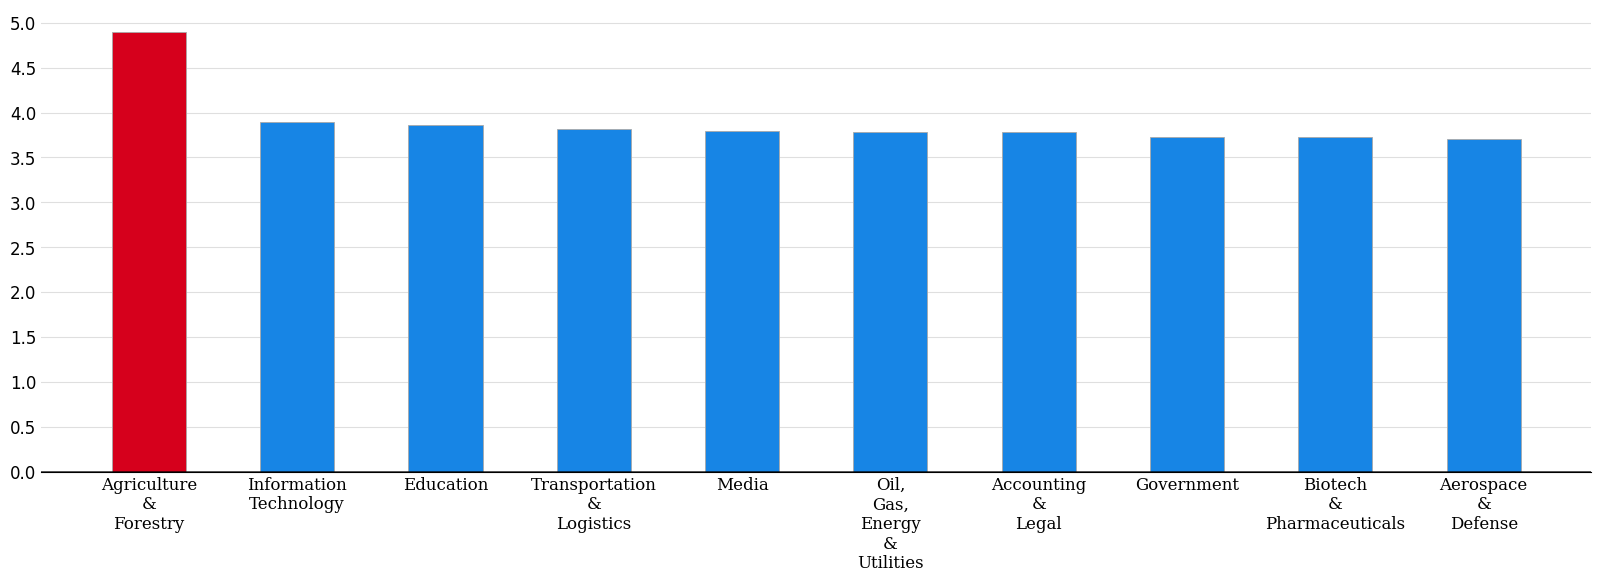

In [9]:
#Построить график популярности по секторам работы
d1 = df.groupby('Sector')['Rating'].mean()
d2 = pd.Series(d1.index,d1.index)
data = pd.DataFrame([d1,d2]).T.drop('-1').sort_values(by='Rating', ascending=False)
data['Sector'] = data['Sector'].apply(lambda x :  x.replace(' / ',', ').replace(' - ',' ').replace(' ','\n')) 
data = data[:10]

# Plot

color_map = ['#1785e5' for _ in range(data['Rating'].count())]
color_map[0] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(data['Sector'], data['Rating'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data['Sector'], fontfamily='serif', rotation=0)

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 5.5, 0.5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

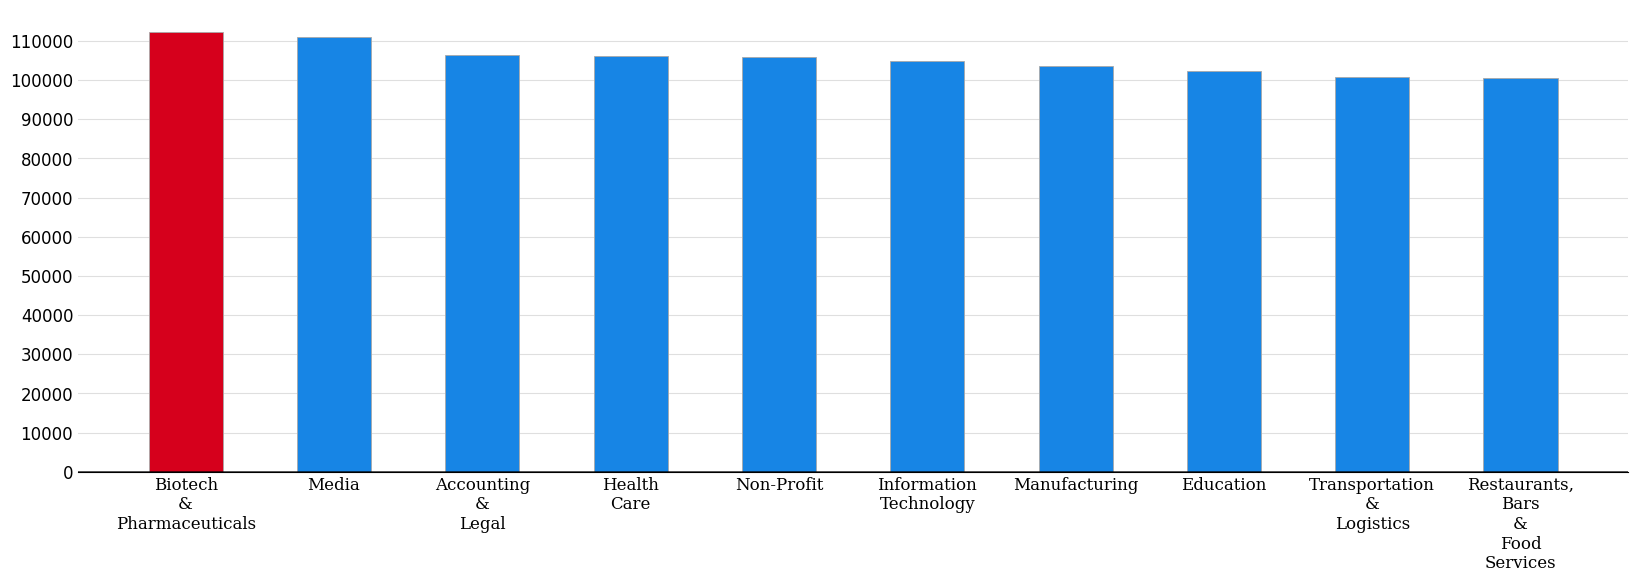

In [10]:
#Построить график используя сектора работы и средний уровень зарплат в них

def salary(x):
    r = 0
    x = x.replace('$','').replace('(Glassdoor est.)','').replace('K','000').split('-')
    min = int("".join(c for c in x[0] if  c.isdecimal()))
    max = int("".join(c for c in x[1] if  c.isdecimal()))
    r = int(np.mean([min,max]))
    return r
df['Salary'] = df['Salary Estimate'].apply(lambda x :  salary(x)) 

d1 = df.groupby('Sector')['Salary'].mean()
d2 = pd.Series(d1.index,d1.index)
data = pd.DataFrame([d1,d2]).T.drop('-1').sort_values(by='Salary', ascending=False)
data['Sector'] = data['Sector'].apply(lambda x :  x.replace(' / ',', ').replace(' - ',' ').replace(' ','\n')) 


data = data[:10]


# Plot

color_map = ['#1785e5' for _ in range(data['Salary'].count())]
color_map[0] =  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(data['Sector'], data['Salary'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data['Sector'], fontfamily='serif', rotation=0)

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 120000, 10000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

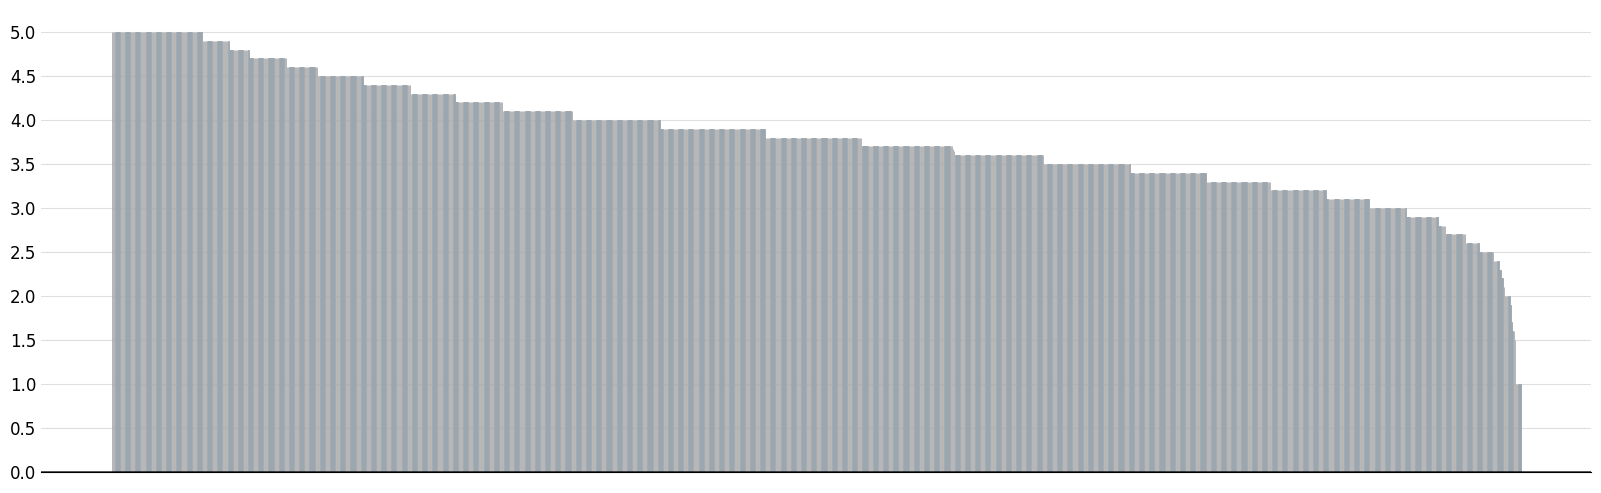

In [11]:
#Построить гистограмму распределения рейтинга компаний
d1 = df.groupby('ComName')['Rating'].mean()
d2 = pd.Series(d1.index,d1.index)
data = pd.DataFrame([d1,d2]).T.sort_values(by='Rating', ascending=False)
data = data[data['Rating']>-1]
# data = data[:15]

# Plot

color_map = ['#1785e5' for _ in range(data['ComName'].count())]

fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(data['ComName'], data['Rating'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.axes.xaxis.set_visible(False)

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 5.5, 0.5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

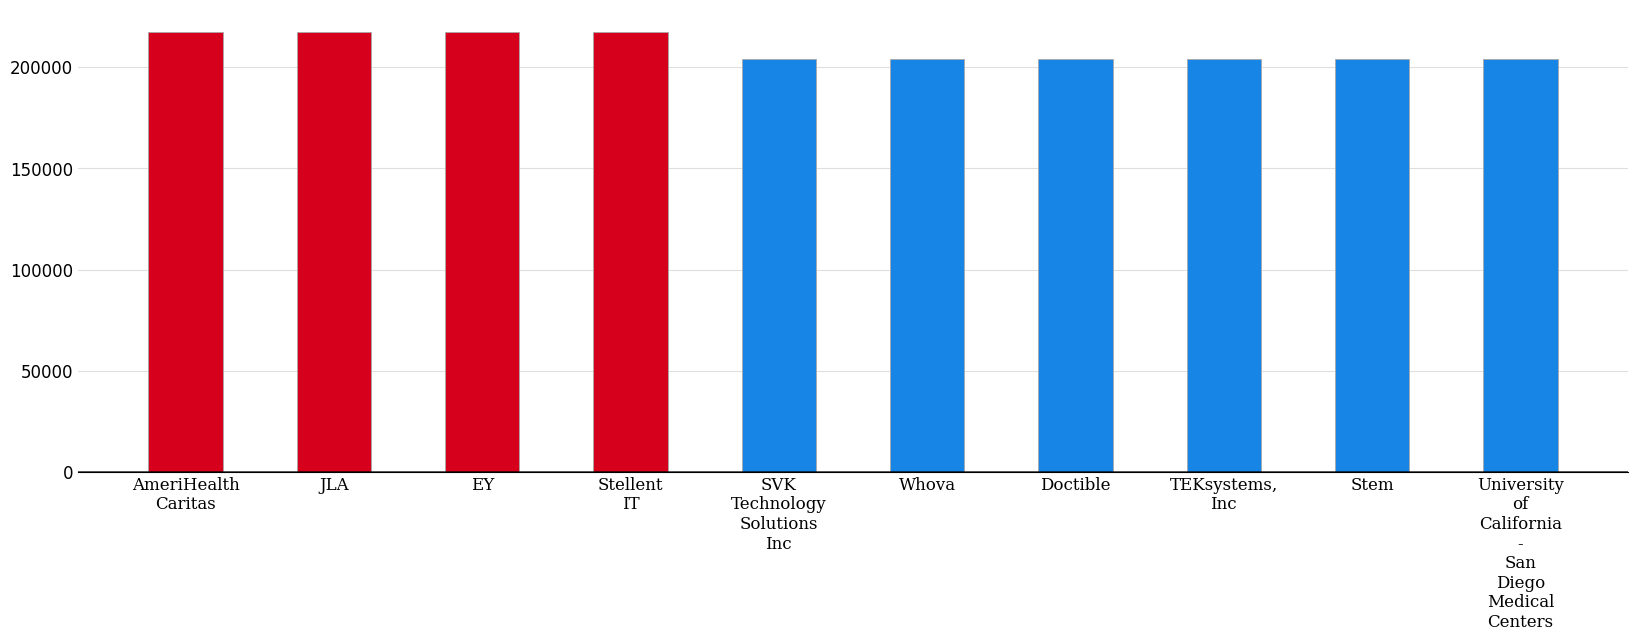

In [12]:
#Построить график средних зарплат по популярным компаниям
d1 = df.groupby('ComName')['Salary'].mean()
d2 = pd.Series(d1.index,d1.index)
data = pd.DataFrame([d1,d2]).T.sort_values(by='Salary', ascending=False)


data = data[:10]


# Plot

color_map = ['#1785e5' for _ in range(data['Salary'].count())]
color_map[0] = color_map[1] = color_map[2] = color_map[3]=  '#d6001c' # color highlight

fig, ax = plt.subplots(1,1, figsize=(20, 6))
ax.bar(data['ComName'], data['Salary'], width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data['ComName'], fontfamily='serif', rotation=0)

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 230000, 50000) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

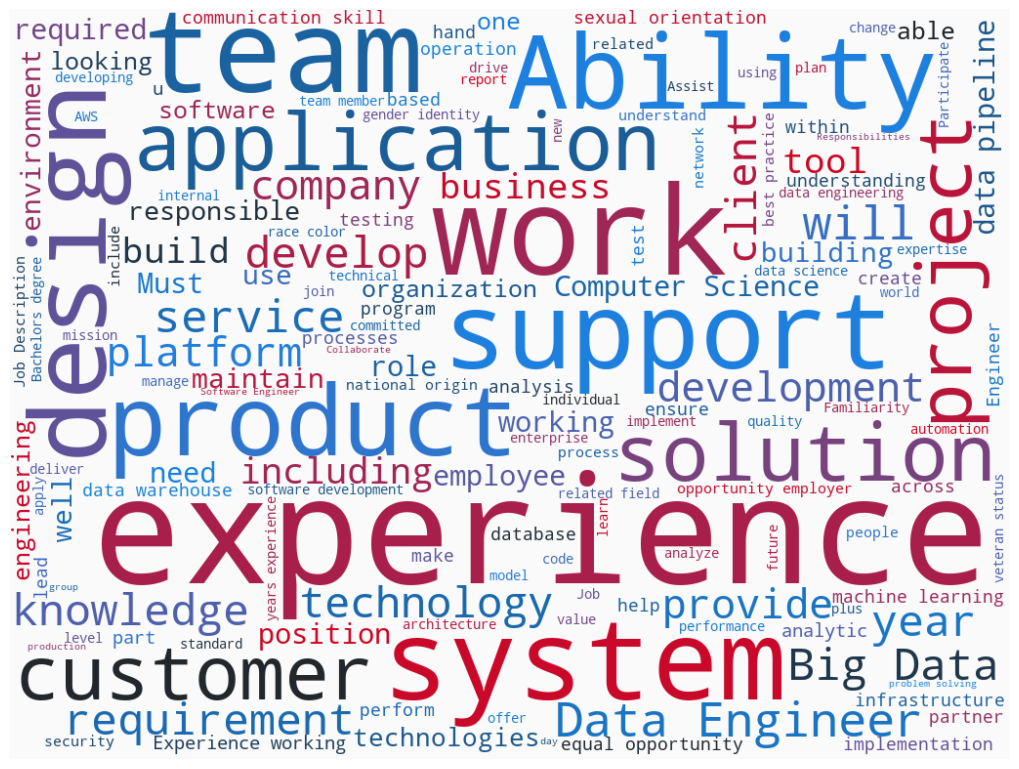

In [13]:
#Построить описаний вакансий облако тегов, исследовать самые популярные слова

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#d6001c','#1785e5', '#222324'])

text = str(list(df['Job Description'])).replace('\\n', ' ').replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '').replace('(', '').replace(')', '')

wordcloud = WordCloud(background_color = '#fafafa', width = 1024,  height = 768,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()